In [17]:
## MNIST with Neural Network(DEEP Learning) 
## MNIST 문제를 딥러닝을 사용해서 정확도를 높혀보자
## tensorflow가 기본으로 제공하는 예제를 이용해서 구현하기 

import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data
import warnings 

warnings.filterwarnings(action = "ignore") # warning 출력 방지 

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist",one_hot=True)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [ ]:
# Placeholder 
X = tf.placeholder(shape=[None, 784], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype = tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.Variable(tf.random_normal([784,256]), name = "weight") # 뒷'열'(perceptron)은 내가 잡고 싶은 대로 조정
b1 = tf.Variable(tf.random_normal([256]), name = "bias")       # 단 depth 가 깊으면 깊을수록 처리하기 곤란해진다
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,256]), name = "weight2") 
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]), name = "weight3") 
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")      
layer3 = tf.sigmoid(tf.matmul(layer2,W3) + b3)


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.softmax(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train 
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
num_of_epoch = 300 
batch_size = 100 

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0 # 코스트 초기화(국룰)
    
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
                                                        Y:batch_y})
    if step % 30 == 0 :
        print("Cost는 : {}".format(cost_val))



Cost는 : 3.5787243843078613
Cost는 : 0.5145321488380432
Cost는 : 0.36675402522087097
Cost는 : 0.25307580828666687
Cost는 : 0.23830538988113403
Cost는 : 0.3348872661590576


In [ ]:
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도는 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:mnist.test.images, 
                                              Y:mnist.test.labels})))
# 정확도가 뛰어나지 않다?

In [ ]:
## 생각보다 정확도가 많이 향상되지 않았다! 
## Hinton교수가 원인을 파악하고자 노력했다. 
## deep learning이 좀더 학습이 잘 되기 위해선 layer를 추가하고 각 layer에 많은 perceptron을 추가해서 구현 
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data
import warnings 

warnings.filterwarnings(action = "ignore") # warning 출력 방지 

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist",one_hot=True)

In [22]:
#그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 784], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype = tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.Variable(tf.random_normal([784,256]), name = "weight") # 뒷'열'(perceptron)은 내가 잡고 싶은 대로 조정
b1 = tf.Variable(tf.random_normal([256]), name = "bias")       # 단 depth 가 깊으면 깊을수록 처리하기 곤란해진다
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,256]), name = "weight2") 
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]), name = "weight3") 
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")      
layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.relu(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train 
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
num_of_epoch = 30
batch_size = 100 

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0 # 코스트 초기화(국룰)
    
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
                                                        Y:batch_y})
    if step % 3 == 0 :
        print("Cost는 : {}".format(cost_val))



Cost는 : 15.567130088806152
Cost는 : 13.164533615112305
Cost는 : 1.4235243797302246
Cost는 : 5.230926513671875
Cost는 : 2.595508337020874
Cost는 : 0.20217889547348022
Cost는 : 0.014959617517888546
Cost는 : 1.2006701581412926e-05
Cost는 : 0.06828956305980682
Cost는 : 0.025428257882595062


In [23]:
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도는 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:mnist.test.images, 
                                              Y:mnist.test.labels})))


정확도는 : 0.9348999857902527


In [18]:
## Hinton 교수님이 중요하게 여기는 또 하나의 요건은 W의 초기값
## 초기에는 RBM이라는 방법을 이용하여 초기화를 진행 
## 2010 년도에 Xavier 초기화라는 방식으로 논문으로 발표 
## 2015 년에는 He's 초기화라는 방식의 논문으로 발표 
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data
import warnings 

warnings.filterwarnings(action = "ignore") # warning 출력 방지 

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist",one_hot=True)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [ ]:
## Overfitting(과적합)
## 학습한 모델이 training data set에 최적화되어 있는 상태 
## 테스트 데이터에는 잘 들어맞지 않는 상태를 지칭

## 학습한 모델이 training data set에는 약 98% 이상 정확도를 가지지만
## test data set에 대해서는 85% 정도 밖에 나오지 않는 다면 그건 overfitting 

## 1. 일단 학습하는 데이터 수 가 많아야 한다. 
## 2. 필요없는 feature들은 학습에서 제외 
##    중복되는 feature들은 단일화 시켜야한다. 
## 3. 학습하는 과정에서 overfitting을 피할 수 있다. 
## (2014년 논문, logistic을 선택적으로 줄이면 overfitting을 피할 수 있다고 주장 -> dropout)
##  -> 이 역시 tensorflow에서 제공된다. 

In [49]:
# 그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 784], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype = tf.float32)
dout_rate =tf.placeholder(dtype=tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.get_variable("Weight1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")        
_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
layer1 = tf.nn.dropout(_layer1, rate =dout_rate ) #'죽이는 비율'설정 -> 과적합 방지 (학습시 수치 설정)
                                                  # test data로 검사결과(정확도)뽑을 때는 당연 빼야한다 
W2 = tf.get_variable("Weight2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
_layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate = dout_rate )

W3 = tf.get_variable("Weight3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")      
_layer3 = tf.nn.relu(tf.matmul(layer2,W2) + b2)
layer3 = tf.nn.dropout(_layer3, rate = dout_rate )


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.relu(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train 
# AdamOptimizer 사용해보기 
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
num_of_epoch = 30
batch_size = 100 

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0 # 코스트 초기화(국룰)
    
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
                                                        Y:batch_y,
                                                        dout_rate:0.3})
    if step % 3 == 0 :
        print("Cost는 : {}".format(cost_val))


Cost는 : 0.488850861787796
Cost는 : 0.21620486676692963
Cost는 : 0.2792198657989502
Cost는 : 0.5132141709327698
Cost는 : 0.1840788871049881
Cost는 : 0.08009351044893265
Cost는 : 0.23177069425582886
Cost는 : 0.2800581455230713
Cost는 : 0.08646810799837112
Cost는 : 0.15106232464313507


In [51]:
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도는 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:mnist.test.images, 
                                              Y:mnist.test.labels,
                                              dout_rate:0})))


정확도는 : 0.9649999737739563


In [1]:
## Kaggle Mnist에 들어가기 앞서
## Titanic 데이터 셋으로 딥러닝 학습을 시행해보자 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import warnings 
from sklearn.linear_model import LogisticRegression 


warnings.filterwarnings(action = "ignore") # warning 출력 방지

train_df = pd.read_csv("./data/titanic/train.csv")

train_df.shape #(891, 12)

(891, 12)

In [2]:
#누적그래프 함수 만들기
def stackedBarChart(feature):
    survived = train_df.loc[train_df["Survived"]==1][feature].value_counts() 
    survived.name = "Survived"
    survived
 
    dead = train_df.loc[train_df["Survived"]==0][feature].value_counts()
    dead.name = "Dead"
    dead

    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind="bar", stacked=True) #누적 막대 그래프를 그리겠다고 선언 


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Ms            1
Jonkheer      1
Don           1
Lady          1
Countess      1
Capt          1
Sir           1
Name: Title, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,3
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,NaN,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,0


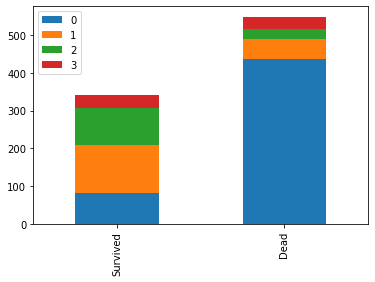

In [3]:
# Feature Engineering
# 1. Name 
# + 사용할 feature/ 사용하지 않을 feature 구분 
train_df["Title"]= train_df["Name"].str.extract("([A-Za-z]+)\.") #영문자, 대소문자 한 다음에 . 이 나오는 형태만 뽑아라
                                              # (Mr. Mrs. Miss. Rev. ...)
print(train_df["Title"].value_counts()) #Title 컬럼에 대해서 몇 개 있는지 출력 
#Title안에 Mr. Miss Mrs. Other를 각각 0,1,2,3으로 변환 (Series의 map 이용)
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Jonkheer" :3, "Countess" :3,
                      "Lady" :3, "Mme" :3, "Ms" :3,
                      "Sir" :3, "Capt" :3} #mapping되는 형태를 dict 형식으로 선언
train_df["Title"]=train_df["Title"].map(title_mapping_dict)
train_df #출력 확인(컬럼생성여부)
stackedBarChart("Title") # Mr. 가 압도적으로 많이 죽은것을 확인 

#제거할 건 제거하자(너무 결측치가 많거나 상관없어 보인다)
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
train_df.drop("PassengerId", axis=1, inplace=True)
#train_df.drop("Embarked", axis=1, inplace=True)
train_df

In [4]:
# 2. 성별  
sex_mapping_dict = {'male': 0, 'female':1}
train_df["Sex"]=train_df["Sex"].map(sex_mapping_dict)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,3
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,NaN,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,2,0


None

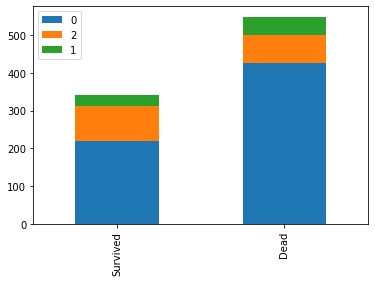

In [5]:
# 3. 탑승지역 
#탑승지역의 결측치를 "S"로 대체 (그냥 S에서 가장많이 타서..)
train_df["Embarked"].fillna("S", inplace=True)
# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} #linear처럼 가중치를 크게 생각하지 않고 그냥 나눠준다고(구분) 생각 
train_df["Embarked"]=train_df["Embarked"].map(embarked_mapping_dict)
display(train_df)
display(stackedBarChart("Embarked"))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,2,2
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,2
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,3
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,21.773973,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,2,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,1.0,1,0,71.2833,2,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,1.0,1,0,53.1000,0,2
4,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,3
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,1.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,2,0


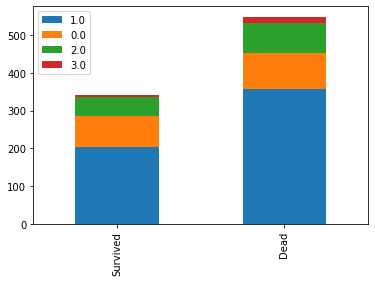

In [6]:
# 4. Age + 결측치제거 
# 가능한한 타당한 이유로 결측치를 다른 값으로 대체해 주어야 한다. 
# -전체사람의 평균을 구해서 결측치를 채운다. 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = train_df.groupby("Title")["Age"].mean()
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
train_df["Age"]=result_series.sort_index()
display(train_df)

# Age에 대해서 Binning 처리 
# Binning 처리를 할 때 고려해야 할 사항 -> 간격은 어떻게 설정? 
# Age -> 0~20 :0 
# Age -> 20살 초과~40이하 : 1
# Age -> 40살 초과~60이하 : 2
# Age -> 60살초과 : 3
train_df.loc[train_df["Age"] <= 20, "Age"] = 0
train_df.loc[(train_df["Age"] > 20) & (train_df["Age"] <= 40), "Age"] = 1
train_df.loc[(train_df["Age"] > 40) & (train_df["Age"] <= 60), "Age"] = 2
train_df.loc[60 < train_df["Age"] , "Age"] = 3

stackedBarChart("Age") # 20대~40대 인원들이 가장 많이 죽음(원래 구성비율자체가 높음)
display(train_df) # 이 셀만 다시 실행하면 다 꼬인다!! 재실행시 유의할 것
                  # 운임요금(Fare) 를 마지막 binning 처리 대상으로! 

512.3292
0.0
7.9104
14.4542
31.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,1.0,1,0,3.0,2,2
2,1,3,1,1.0,0,0,1.0,0,1
3,1,1,1,1.0,1,0,3.0,0,2
4,0,3,0,1.0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0,3
887,1,1,1,0.0,0,0,2.0,0,1
888,0,3,1,1.0,1,2,2.0,0,1
889,1,1,0,1.0,0,0,2.0,2,0


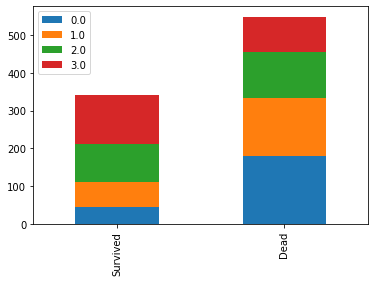

In [7]:
# 5. Fare 
# 여기에 이상치 처리까지하면 모든 전처리가 끝(아마도)
import numpy as np 

print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0

train_df.loc[train_df["Fare"] <= 7.9104, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 7.9104) & (train_df["Fare"] <= 14.4542), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 14.4542) & (train_df["Fare"] <= 31.0), "Fare"] = 2
train_df.loc[31.0 < train_df["Fare"] , "Fare"] = 3

display(train_df)
stackedBarChart("Fare")

In [8]:
## Machine Learning

train_df.shape
train_num = int(train_df.shape[0] * 0.8) #712

#train, test data set 
train_x_data = train_df.drop("Survived", axis = 1, inplace = False)[:train_num]                                                               
test_x_data = train_df.drop("Survived", axis=1, inplace=False)[train_num:] 

# y축은 Survived 하나 
# 2차원 형태로 바꾸어주어야 한다.
train_y_data = train_df["Survived"][:train_num].values.reshape([-1,1]) 
test_y_data = train_df["Survived"][train_num:].values.reshape([-1,1])


In [10]:
# 그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 8], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype = tf.float32)
dout_rate =tf.placeholder(dtype=tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.get_variable("Weight1", shape=[8, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")        
_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
layer1 = tf.nn.dropout(_layer1, rate =dout_rate ) #'죽이는 비율'설정 -> 과적합 방지 (학습시 수치 설정)
                                                  # test data로 검사결과(정확도)뽑을 때는 당연 빼야한다 
W2 = tf.get_variable("Weight2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
_layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate = dout_rate )

W3 = tf.get_variable("Weight3", shape=[256, 1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]), name = "bias3")      
_layer3 = tf.nn.relu(tf.matmul(layer2,W2) + b2)
layer3 = tf.nn.dropout(_layer3, rate = dout_rate )


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.relu(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train 
# AdamOptimizer 사용해보기 
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
train_epoch = 30
batch_size = 100

# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y,
                                        dout_rate:0.03})
    if step % 3 ==0:
        print("Cost값은: {}".format(cost_val))


Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0


In [12]:
#정확도
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도는 : {}".format(sess.run(accuracy, 
                                  feed_dict={X:test_x_data,
                                             Y:test_y_data,
                                             dout_rate:0})))



정확도는 : 1.0


In [14]:
## test.csv를 이용해서 prediction 을 해야 한다. 
## 예측결과가 나온다! -> 파일로 만들어서 제출 

# data loading(train data set loading)
test_df = pd.read_csv("./data/titanic/test.csv")


# Feature Engineering
# Feature : Column 
test_df.head()

test_df["Title"]= test_df["Name"].str.extract("([A-Za-z]+)\.") 
test_df["Title"].value_counts() 
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Dona" :3, "Jonkheer" :3, 
                      "Countess" :3, "Lady" :3, "Mme" :3,
                      "Ms" :3, "Sir" :3, "Capt" :3} 
test_df["Title"]=test_df["Title"].map(title_mapping_dict) #Dona 추가 

#제거할 건 제거하자(안쓸 col들 제거)
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("PassengerId", axis=1, inplace=True)
#test_df.drop("Embarked", axis=1, inplace=True)
# 성별 col에 대해 male=0, female=1로 수정해보자 
sex_mapping_dict = {'male': 0, 'female':1}
test_df["Sex"]=test_df["Sex"].map(sex_mapping_dict)


# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
test_df["Embarked"].fillna("S", inplace=True)
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} 
test_df["Embarked"]=test_df["Embarked"].map(embarked_mapping_dict)


# Age처리 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = test_df.groupby("Title")["Age"].mean()
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
test_df["Age"]=result_series.sort_index()

# Age에 대해서 Binning 처리 
test_df.loc[test_df["Age"] <= 20, "Age"] = 0
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"] <= 40), "Age"] = 1
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"] <= 60), "Age"] = 2
test_df.loc[60 < test_df["Age"] , "Age"] = 3

 
    
# Fare처리
'''
print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0
'''
test_df["Fare"]=test_df["Fare"].fillna(0)
test_df.loc[test_df["Fare"] <= 7.9104, "Fare"] = 0
test_df.loc[(test_df["Fare"] > 7.9104) & (test_df["Fare"] <= 14.4542), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 14.4542) & (test_df["Fare"] <= 31.0), "Fare"] = 2
test_df.loc[31.0 < test_df["Fare"] , "Fare"] = 3


display(test_df)
#######################################################################
# 그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 8], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype = tf.float32)
dout_rate =tf.placeholder(dtype=tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.get_variable("Weight1", shape=[8, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")        
_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
layer1 = tf.nn.dropout(_layer1, rate =dout_rate ) #'죽이는 비율'설정 -> 과적합 방지 (학습시 수치 설정)
                                                  # test data로 검사결과(정확도)뽑을 때는 당연 빼야한다 
W2 = tf.get_variable("Weight2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
_layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate = dout_rate )

W3 = tf.get_variable("Weight3", shape=[256, 1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]), name = "bias3")      
_layer3 = tf.nn.relu(tf.matmul(layer2,W2) + b2)
layer3 = tf.nn.dropout(_layer3, rate = dout_rate )


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.relu(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train 
# AdamOptimizer 사용해보기 
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
train_epoch = 30
batch_size = 100

# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y,
                                        dout_rate:0.03})
    if step % 3 ==0:
        print("Cost값은: {}".format(cost_val))


#예측
result = sess.run(H, feed_dict={X : test_df})
predict = tf.cast(result > 0.5, dtype = tf.int64)
print(sess.run(predict))


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,1.0,0,0,0.0,1,0
1,3,1,2.0,1,0,0.0,0,2
2,2,0,3.0,0,0,1.0,1,0
3,3,0,1.0,0,0,1.0,0,0
4,3,1,1.0,1,1,1.0,0,2
...,...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,1.0,0,0
414,1,1,1.0,0,0,3.0,2,3
415,3,0,1.0,0,0,0.0,0,0
416,3,0,1.0,0,0,1.0,0,0


Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[node Placeholder_2 (defined at C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
	 [[Relu_3/_13]]
  (1) Invalid argument: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[node Placeholder_2 (defined at C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'Placeholder_2':
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\asyncio\base_events.py", line 442, in run_forever
    self._run_once()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\asyncio\base_events.py", line 1462, in _run_once
    handle._run()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3242, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-33318fda2fee>", line 80, in <module>
    dout_rate =tf.placeholder(dtype=tf.float32)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [15]:
## 2차시기 : by sigmoid 
## dropout없이 ㄱㄱ
## test.csv를 이용해서 prediction 을 해야 한다. 
## 예측결과가 나온다! -> 파일로 만들어서 제출 

# data loading(train data set loading)
test_df = pd.read_csv("./data/titanic/test.csv")


# Feature Engineering
# Feature : Column 
test_df.head()

test_df["Title"]= test_df["Name"].str.extract("([A-Za-z]+)\.") 
test_df["Title"].value_counts() 
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Dona" :3, "Jonkheer" :3, 
                      "Countess" :3, "Lady" :3, "Mme" :3,
                      "Ms" :3, "Sir" :3, "Capt" :3} 
test_df["Title"]=test_df["Title"].map(title_mapping_dict) #Dona 추가 

#제거할 건 제거하자(안쓸 col들 제거)
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("PassengerId", axis=1, inplace=True)
#test_df.drop("Embarked", axis=1, inplace=True)
# 성별 col에 대해 male=0, female=1로 수정해보자 
sex_mapping_dict = {'male': 0, 'female':1}
test_df["Sex"]=test_df["Sex"].map(sex_mapping_dict)


# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
test_df["Embarked"].fillna("S", inplace=True)
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} 
test_df["Embarked"]=test_df["Embarked"].map(embarked_mapping_dict)


# Age처리 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = test_df.groupby("Title")["Age"].mean()
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
test_df["Age"]=result_series.sort_index()

# Age에 대해서 Binning 처리 
test_df.loc[test_df["Age"] <= 20, "Age"] = 0
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"] <= 40), "Age"] = 1
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"] <= 60), "Age"] = 2
test_df.loc[60 < test_df["Age"] , "Age"] = 3

 
    
# Fare처리
'''
print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0
'''
test_df["Fare"]=test_df["Fare"].fillna(0)
test_df.loc[test_df["Fare"] <= 7.9104, "Fare"] = 0
test_df.loc[(test_df["Fare"] > 7.9104) & (test_df["Fare"] <= 14.4542), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 14.4542) & (test_df["Fare"] <= 31.0), "Fare"] = 2
test_df.loc[31.0 < test_df["Fare"] , "Fare"] = 3


display(test_df)
#######################################################################
# 머신러닝 대입 

# 그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 8], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype = tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.Variable(tf.random_normal([8,256]), name = "weight") # 뒷'열'(perceptron)은 내가 잡고 싶은 대로 조정
b1 = tf.Variable(tf.random_normal([256]), name = "bias")       # 단 depth 가 깊으면 깊을수록 처리하기 곤란해진다
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,256]), name = "weight2") 
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,1]), name = "weight3") 
b3 = tf.Variable(tf.random_normal([1]), name = "bias3")      
layer3 = tf.sigmoid(tf.matmul(layer2,W3) + b3)


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.sigmoid(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train 
# AdamOptimizer 사용해보기 
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
train_epoch = 30
batch_size = 100

# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y})
    if step % 3 ==0:
        print("Cost값은: {}".format(cost_val))


#예측
result = sess.run(H, feed_dict={X : test_df})
predict = tf.cast(result > 0.5, dtype = tf.int64)
print(sess.run(predict))




,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,1.0,0,0,0.0,1,0
1,3,1,2.0,1,0,0.0,0,2
2,2,0,3.0,0,0,1.0,1,0
3,3,0,1.0,0,0,1.0,0,0
4,3,1,1.0,1,1,1.0,0,2
...,...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,1.0,0,0
414,1,1,1.0,0,0,3.0,2,3
415,3,0,1.0,0,0,0.0,0,0
416,3,0,1.0,0,0,1.0,0,0


Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
Cost값은: 0.0
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [ ]:
#결과 제출용 파일 생성 

#test_df.isnull().sum()
#결과 제출용 파일 생성 

result_df = pd.DataFrame(sess.run(predict))
result_df.rename(columns={0:"Survived"}, inplace = True)
display(result_df)


df = pd.read_csv("./data/titanic/gender_submission.csv")
submit_df= df["PassengerId"]
submit_df = pd.DataFrame(submit_df)
display(submit_df)


submit_df = pd.concat([submit_df, result_df], axis= 1)
display(submit_df)

submit_df.to_csv("./data/titanic/result.csv", index=False)